<h1 align="center">Finding the OLS solution of the linear equation </h1>

\begin{equation*}
    \Large A \vec{x} = \vec{b}
\end{equation*}

<br>

This project was done as part of a course titled *Computational linear algebra*, organized by the university of Jyväskylä.

<br>

<h2 align="left">Introduction</h2>

- Ordinary least squares (OLS) is a mathematical optimization method that seeks to find the best-fit line to a given data.


- More specifically, OLS is a linear regression method that estimates the parameters of a linear model by **minimizing the sum of the squared differences** (cost function) between the observed values of the dependent variable and the predicted values generated by the linear model. Mathematically, the cost function can be written as

$$J(\Theta) = \frac{1}{2m} \sum_{i = 1}^{m} (h_{\Theta}(x^{(i)})-y^{(i)})^{2}. $$

In this tutorial I'll go through how to solve the OLS of the linear equation $\, A \vec{x} = \vec{b} \,$ by
- solving the OLS from the **normal equation**
- using the **singular value decomposition (SVD)**
- using the **QR-decomposition**
- using **NumPy functions**.

This tutorial draws inspiration from both the book '*Basics of Linear Algebra for Machine Learning*' by **Jason Brownlee**, and the article '*A Singularly Valuable Decomposition: The SVD of a Matrix*' by **Dan Kalman**.

<br>

<h1 align="center">Linear regression</h1>

The most typical application of OLS is the linear regression algorithm. Linear regression is a method for modeling the relationship between one or more independent variables and a dependent variable. In linear regression, the independent variables can be both continuous and categorical, but the dependent variable has to be continuous. The objective of creating a linear regression model is to find the $\beta$ coefficient values that minimize the error in the prediction of the output (dependent) variable y. In practice, this is typically achieved by finding a solution where the model's $\beta$ coefficients minimize the sum of the squared errors (SSE, sum of squared errors).

\begin{equation*}
    SSE = \sum_{i=n}^{n} (y_i - \hat{y}_i)^2.
\end{equation*}

In matrix notation, this problem can be formulated using the so-called normal equation:

\begin{equation*}
    X^T X b = X^T y,
\end{equation*}

which can then be re-arranged in order to specify the solution for b as

\begin{equation*}
    b = (X^T X)^{-1} X^T y.
\end{equation*}

<br>

<h2 align="left">The normal equation</h2>

The ordinary least squares (OLS) solution to a linear equation

$$ A \vec{x} = \vec{b} $$

can be achieved by solving the so-called normal equation, which can be expressed in matrix form as follows

$$ A^T A \vec{x} = A^T \vec{b}. $$

The OLS solution is then given by 

$$ \vec{x} = (A^T A)^{-1} A^T \vec{b}. $$

- As seen from the equation above, the normal equation approach to solving the OLS works only when $\, \boldsymbol{A^T A} \,$ is **invertible**.
- $\, \boldsymbol{A^T A} \,$ is **invertible** if and only if $\, det(A^T A) \ne 0. \,$


- It is worth noting that while the normal equation provides a **closed-form solution** to the OLS problem, it can be computationally expensive to solve for large matrices. In practice, other methods such as **QR decomposition** or **singular value decomposition (SVD)** are often used to obtain the OLS solution more efficiently and accurately.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def OLS_inv(A, b):
    
    det_AT_A = np.linalg.det(A.T @ A)
    
    if det_AT_A != 0:
        return (np.linalg.inv(A.T @ A) @ (A.T @ b))
    else:
        print("A^T A is not invertible. Numerical methods are needed for the OLS solution.")

Let's use a real data set to confirm that the function works.

In [3]:
df = pd.read_csv("C:/Users/testi/Desktop/excel_files/Real_estate_data.csv")
df.index += 1

In [4]:
X = df[["dist_to_mrt_m", "n_convenience"]].copy()
unos = np.ones(len(X))
X.insert(0, "intercept", unos)

In [5]:
y = df["price_twd_msq"]

In [6]:
print(X.shape)
print(y.shape)

(414, 3)
(414,)


In [7]:
OLS_inv(X, y)

array([ 1.18374895e+01, -1.68774823e-03,  3.62359771e-01])

To confirm that this indeed is the OLS solution, one can use NumPy's lstsq() function to confirm the results or even fit a linear regression model, and check the parameters.

In [8]:
np.linalg.lstsq(X, y, rcond=None)[0]

array([ 1.18374895e+01, -1.68774823e-03,  3.62359771e-01])

In [9]:
import statsmodels.api as sm

In [10]:
model_statsmodels = sm.OLS(y, X).fit()

In [11]:
model_statsmodels.params

intercept        11.837489
dist_to_mrt_m    -0.001688
n_convenience     0.362360
dtype: float64

- It's unfortunate that the display style of the numbers is different, but one can confirm via calculator that these coefficients are indeed the same than the coefficients that the self-made OLS_inv() and NumPy's lstsq() functions returned.


- Perhaps the sklearn module has a different display style of the $\, \boldsymbol{\beta} \,$ coefficients. 

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model_sklearn = LinearRegression(fit_intercept=False).fit(X, y)

In [14]:
model_sklearn.coef_

array([ 1.18374895e+01, -1.68774823e-03,  3.62359771e-01])

- Fantastic.

Lastly, let us insert a matrix A for which $\, det(A^T A) = 0 \,$  to the self-made OLS_inv() function. The function should not return a solution to the OLS, since $\, det(A^T A) = 0 \,$ means that $\, A^T A \,$ is singular. As stated before, the normal equation provides a closed-form solution to the OLS, which only works when $\, A^T A \,$ is **not** singular (meaning that $\, A^T A \,$ is invertible).

In [15]:
A = np.array([[1, 2], [2, 4], [3, 6]])

In [16]:
b = np.array([1, 5, 7])

In [17]:
np.round(np.linalg.det(A.T @ A), 10)

0.0

In [18]:
OLS_inv(A, b)

A^T A is not invertible. Numerical methods are needed for the OLS solution.


- OK!

One can fit a regression line to a given data set manually with the plt.axline() function.

In [19]:
beta = OLS_inv(X, y)

# Unpack the beta coeffs
ic, dist_to_mrt_m, n_convenience = beta

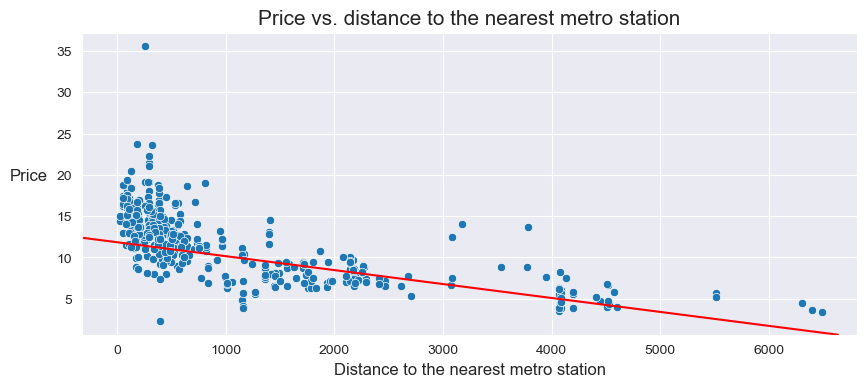

In [20]:
plt.figure(figsize=(10, 4), dpi=100)
sns.set_style("darkgrid")

# Create a scatter plot
sns.scatterplot(x=X["dist_to_mrt_m"], y=y)
# Add the regression line
plt.axline(xy1=(0, ic), slope=dist_to_mrt_m, color="r")

plt.title("Price vs. distance to the nearest metro station", size=15)
plt.xlabel("Distance to the nearest metro station", size=12)
plt.ylabel("Price", rotation=0, labelpad=20, size=12);

Note that one can predict the values of the output variable y (predicted values of y are denoted as $\, \boldsymbol{\hat{y}} \,$) with the $\, \beta \,$ coefficients and the input variables X. With matrix notation this can be written as

$$ \, \hat{y} = X \beta, \,$$

where **X** is a design matrix with each column representing a data feature, and $\, \boldsymbol{\beta} \,$ is a vector containing the regression coefficients.

Let's add the true observed values of **y** and the predicted values $ \, \boldsymbol{\hat{y}} \,$ to the same plot.

In [21]:
yhat = X @ beta

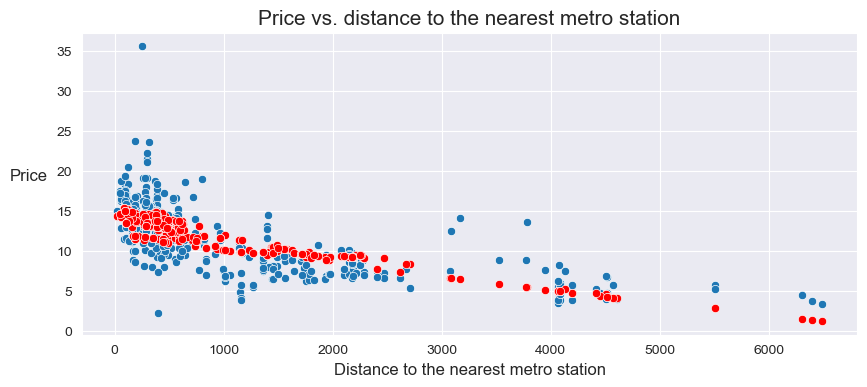

In [49]:
plt.figure(figsize=(10, 4), dpi=100)

sns.scatterplot(x=X["dist_to_mrt_m"], y=y)
sns.scatterplot(x=X["dist_to_mrt_m"], y=yhat, color="red")

plt.title("Price vs. distance to the nearest metro station", size=15)
plt.xlabel("Distance to the nearest metro station", size=12)
plt.ylabel("Price", rotation=0, labelpad=20, size=12);

Note that one can create a scatter plot with a regression line  with seaborn's regplot.

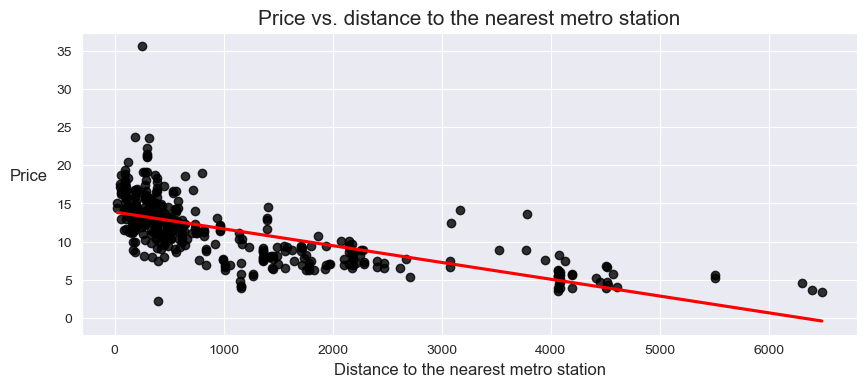

In [50]:
plt.figure(figsize=(10, 4), dpi=100)
sns.regplot(x=X["dist_to_mrt_m"], 
            y=y, 
            ci=None, 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "red"})

plt.title("Price vs. distance to the nearest metro station", size=15)
plt.xlabel("Distance to the nearest metro station", size=12)
plt.ylabel("Price", rotation=0, labelpad=20, size=12);

- "Under the hood", regplot calculates the best-fit line using the OLS regression algorithm, which minimizes the sum of the squared residuals between the predicted and actual values of the dependent variable.

A problem with this approach (solving via inverse) is that the matrix inverse is both computationally expensive and numerically unstable. An alternative approach is to use a **matrix decomposition** to avoid this operation. 

<br>

<br>

<h2 align="left">Singular Value Decomposition (SVD)</h2>

The singular value decomposition (SVD) is closely related to the theory of diagonalizing a symmetric matrix. Let A  be a symmetric $n$ x $n$ matrix consisting of real values. Then there exists an orthogonal $n$ x $n$ matrix V and a diagonal $n$ x $n$ matrix D such that $A = VDV^T$. Note that orthogonal square matrices are invertible  and $V^{-1} = V^T$. The diagonal entries of D are the eigenvalues of A, and the columns of V are eigenvectors for A and form an orthonormal basis for $\mathbb{R}^n$. Note that the ith column (eigenvector) of V corresponds to the eigenvalue $a_{ii}$ in D. Because of the close connection to SVD, $A = VDV^T$ is often referred as the eigenvalue decomposition (EVD).


The SVD can be thought of as the generalization of the EVD, and it can be constructed to any $m$ x $n$ matrix. This makes it a powerful tool in many theoretic and numeric applications of linear algebra. The SVD begins with an arbitrary real $m$ x $n$ matrix A. Now, there exists an orthogonal $m$ x $m$ matrix U and an orthogonal $n$ x $n$ matrix V, such that $A = U \Sigma V^T$. $\Sigma$ is a diagonal matrix that has the same dimensions as A, where the diagonal contains the square roots of the positive eigenvalues of a $n$ x $n$ matrix $A^TA$, in descending order of magnitude. These square roots of the positive eigenvalues of A are called the singular values of A. The columns of U and V are called the left and right singular vectors of A. An interesting observation regarding the close connection between SVD and EVD is that if A is symmetric and has no negative eigenvalues, then they are identical. That is, for any A, the SVD and EVD of $A^TA$ are the same.


The applications of the SVD generally involve large matrices with dimensions that can reach several thousands. These applications include the principal component analysis and generalized inverse of a matrix. Principal component analysis is a statistical technique that involves computing the eigenvalue decomposition (EVD) of a covariance matrix. One of the most direct applications of the singular value decomposition (SVD) is to efficiently compute the EVD of a matrix product, such as $A^T A$, which arises frequently in principal component analysis and covariance matrix analysis. The pseudoinverse, or the Moore-Penrose inverse, is a specific type of generalized inverse of a matrix that can be defined for any matrix. 
One common application of the pseudoinverse is in numerical methods for solving the ordinary least squares (OLS) problem, where the goal is to find the best fit line that minimizes the sum of the squared errors between the observed values and the predicted values. The pseudoinverse provides an efficient way to compute the solution to this problem, even when the matrix is not invertible.

For the OLS solution involving SVD, an application of the SVD called **pseudoinverse** (**Moore-Penrose inverse**) can be used. As the name *pseudoinverse* states, this application can be used to approximate the OLS solution even when A is not invertible. More precisely, if A is not invertible, the pseudoinverse  of A, denoted as $\, \boldsymbol{A^+}, \,$ is a generalization of the inverse that can be used to solve the linear equation $\, \boldsymbol{A \vec{x} = \vec{b}} \,$ in a least-squares sense. 

Let **A** be a $m$ x $n$ matrix, and let $\, rank(A) = r \,$. Now, the **SVD** of A can be written as

$$ A = U \Sigma V^T, $$

where U is an orthogonal $m$ x $m$ matrix, V is an orthogonal $n$ x $n$ matrix, and $\, \Sigma \,$ is a diagonal matrix such that the diagonal elements are the positive singular values of matrix A in descending order of magnitude. Now, matrix

$$ A^+ = U \Sigma^+ V^T, $$

where $$\, \Sigma^+ \, = \begin{bmatrix}
                         D^{-1}_r & 0\\
                         0 & 0
                         \end{bmatrix}_{n \, x \, m}, $$

where $$\, D^{-1}_r \, = \begin{bmatrix}
                         \frac{1}{\sigma_1} & \dots & 0\\
                         \vdots & \ddots & \vdots\\
                         0 & \dots & \frac{1}{\sigma_r}
                         \end{bmatrix} $$
                         
is the generalized inverse matrix of A (pseudoinverse).

In [24]:
def OLS_pinv(A, b):
    
    A = A.astype(float)
    U, S, V = np.linalg.svd(A)
    
    S = np.round(S, 5)
    
    # S contains the positive singular values of A. 
    # One should remove values close to zero (if they are present) from the singular values, 
    # so that in the next step the possibility of dividing by zero is removed
    S = S[S!=0]
    
    # Take the reciprocal of the positive singular values of matrix A
    S_reciprocal = 1/S
    
    # Now, one has to construct the matrix Sigma. 
    # Note that the dimensions of Sigma are the dimensions of A transpose.
    Sigma = np.zeros_like(A.T)
    
    # Insert the positive singular values of A into the diagonal of Sigma.
    for i in range(len(S)):
        Sigma[i, i] = S_reciprocal[i]
        
    # Note that np.linalg.svd(A) returns matrix V already transposed,
    # so if one wishes to perform matrix multiplication with V in its original form,
    # one has to transpose V again, since (V^T)^T = V.
    
    pseudoinverse = V.T @ Sigma @ U.T
    
    OLS = pseudoinverse @ b
    return OLS    

In [25]:
OLS_pinv(X, y)

array([ 1.18374897e+01, -1.68774831e-03,  3.62359749e-01])

In [26]:
len(X.values)

414

In [27]:
OLS_inv(X, y)

array([ 1.18374895e+01, -1.68774823e-03,  3.62359771e-01])

In [28]:
np.linalg.lstsq(X, y, rcond=None)[0]

array([ 1.18374895e+01, -1.68774823e-03,  3.62359771e-01])

- Since it was previously already confirmed that the **OLS_inv(A, b)** function works, and **OLS_pinv(A, b)** gives the same coefficients, it can be concluded that this function works as well (for invertible matrices).


- However, the **OLS_pinv(A, b)** should not raise an error if one passes a matrix A as the parameter for which $\, \boldsymbol{A^T A} \,$ is not invertible.

In [29]:
A = np.array([[1, 2], [2, 4], [3, 6]])

In [30]:
b = np.array([1, 5, 7])

In [31]:
np.round(np.linalg.det(A.T @ A), 10)

0.0

- Since $\, det(A^T A) = 0 \,$, $\, \boldsymbol{A^T A} \,$ is not invertible.

In [32]:
OLS_pinv(A, b)

array([0.45714287, 0.91428574])

- To check that this indeed is the OLS solution, one can confirm it by using NumPy's **lstsq()** function or by fitting a linear regression model and checking the parameters.

In [33]:
np.linalg.lstsq(A, b, rcond=None)[0]

array([0.45714286, 0.91428571])

In [34]:
sm.OLS(b, A).fit().params

array([0.45714286, 0.91428571])

- It Indeed seems that the self-made **OLS_pinv(A, b)** function works for singular matrices as well.

Let's use the OLS_pinv(A, b) function to predict the mass of a fish, given its length

In [35]:
fish = pd.read_csv("C:/Users/testi/Desktop/excel_files/fish.csv")
fish.index += 1

In [36]:
# Design matrix
X0 = np.ones(len(fish))
X_fish = pd.DataFrame({"Intercept": X0,
                       "Length_cm": fish["length_cm"]})

In [37]:
# Response variable
y_fish = fish["mass_g"]

In [38]:
print(f"Dimensions of X_fish: {X_fish.shape}")
print(f"Dimensions of y_fish: {y_fish.shape}")

Dimensions of X_fish: (128, 2)
Dimensions of y_fish: (128,)


In [39]:
# Extract the beta coefficients produced by the OLS_pinv(A, b) function.
coefs = OLS_pinv(X_fish, y_fish)

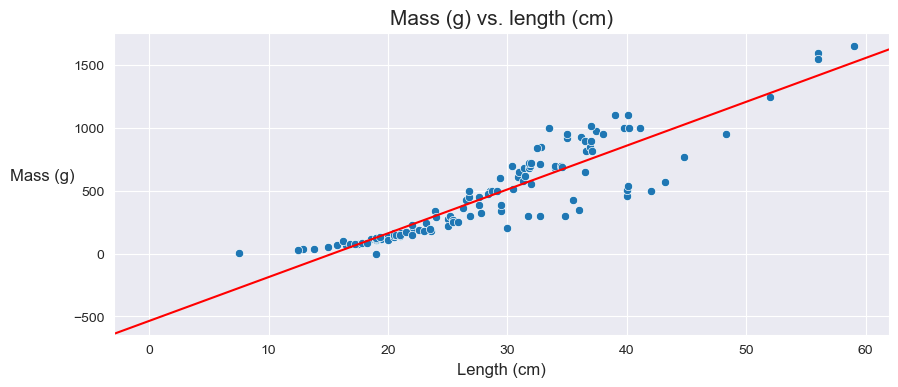

In [40]:
plt.figure(figsize=(10, 4), dpi=100)
sns.scatterplot(x=X_fish["Length_cm"], y=y_fish)

# Add the regression line
plt.axline(xy1=(0, coefs[0]), slope=coefs[1], color="r")

plt.title("Mass (g) vs. length (cm)", size=15)
plt.xlabel("Length (cm)", size=12)
plt.ylabel("Mass (g)", rotation=0, labelpad=22, size=12);

Let's plot the true observed values of the response variable y and the predicted values $\, \hat{y} \,$ in the same graph.

Remember, that one can obtain the predicted values of y with a matrix vector multiplication 

$$ \hat{y} = X\beta, $$

where X is a design matrix where the columns contain the data features, and $\, \beta \,$ is a vector containing the regression coefficients.

In [41]:
yhat_fish = X_fish @ coefs

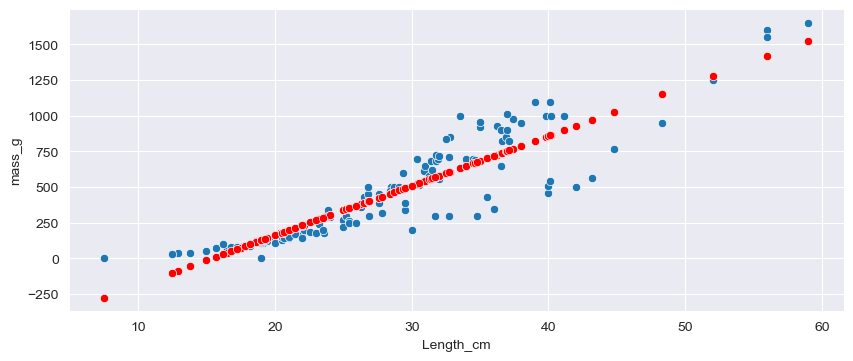

In [42]:
plt.figure(figsize=(10, 4), dpi=100)

sns.scatterplot(x=X_fish["Length_cm"], y=y_fish)
sns.scatterplot(x=X_fish["Length_cm"], y=yhat_fish, color="r");

Sometimes it can be useful to compare the actual and predicted values side by side.

In [43]:
frame = pd.DataFrame({"Actual": y_fish,
                      "Predicted": np.round(yhat_fish, 1),
                      "Residual": np.round((y_fish - yhat_fish), 1)})
frame.head()

,Actual,Predicted,Residual
1,242.0,273.4,-31.4
2,290.0,301.4,-11.4
3,340.0,297.9,42.1
4,363.0,381.6,-18.6
5,430.0,388.6,41.4


In [72]:
MSE = sum(frame["Residual"]**2) / len(frame)
MSE

22780.071484375003

- Note that by taking the squared sum of the Residual column and dividing it by its length, we get the **sum of the squared differences**, which the OLS method aims to minimize.

<br>

<br>

<h2 align="left">QR Decomposition</h2>

The QR decomposition is an approach of breaking a matrix down into its constituent elements.

$$ A = Q R, $$

where A is the matrix to decompose, Q is a $m \, x \, m$ matrix, and R is an $m \, x \, n$ upper triangle matrix.

The $\, \beta \,$ coefficients can be found using the Q and R elements as follows:

$$ b = R^{-1} Q^T y. $$

In [44]:
def OLS_QR(A, b):
    
    # Split matrix A into matrices Q and R
    Q, R = np.linalg.qr(A)
    # Return the coefficients following the formula above
    coeffs = np.linalg.inv(R) @ Q.T @ b
    return coeffs

Let's use the same fish data.

In [45]:
OLS_QR(X_fish, y_fish)

array([-536.22394738,   34.89924531])

In [46]:
OLS_pinv(X_fish, y_fish)

array([-536.22422989,   34.89925416])

In [47]:
OLS_inv(X_fish, y_fish)

array([-536.22394738,   34.89924531])

In [48]:
np.linalg.lstsq(X_fish, y_fish, rcond=None)[0]

array([-536.22394738,   34.89924531])

- All of the self-made functions seem to return almost identical values compared to NumPy's **lstsq()** function, which of course is not by chance, since NumPy's lstsq function uses these same methods to obtain the OLS solution, depending on the properties of the input matrix A.

<br>

<br>

<h2 align="center">Summary</h2>

In this tutorial, you discovered the matrix formulation of the linear regression algorithm and how to solve it using direct (normal equation) and matrix factorization (SVD decomposition, QR decomposition) methods. 

More specifically, you learned
- Linear regression and the matrix reformulation with the normal equations.
- How to solve linear regression via the SVD decomposition and pseudoinverse.
- How to solve linear regression via the QR decomposition.

Note that in the context of this tutorial, solving linear regression refers to finding the ordinary least squares (OLS) solution, which is the set of parameter values that minimize the sum of squared errors between the predicted values and the actual values of the response variable.